In [3]:
pip install yfinance

In [4]:
from LSTM_API import LSTM_train, predict
from get_stock_prices_API import get_stock_prices
import yfinance as yf
import pandas as pd

In [13]:
Stock = None        #choose stock
period = None       #choose period

In [5]:
Stock = yf.download(tickers=Stock, period = period, interval = '1d')

[*********************100%***********************]  1 of 1 completed


In [6]:
timestep = 3

epochs = 15
batch_size = 50
validation_split = 0.1
train_test_split_date = '2021-09-05'


In [7]:
reddit_data = pd.read_csv("group.csv")                                                      ### Reddit Data from the Reddit Post Generator Script
reddit_data['Date']= pd.to_datetime(reddit_data['Date'])
reddit_data = reddit_data.drop(columns=['Unnamed: 0'])
reddit_data = reddit_data.rename(columns={"0":"Average_Reddit_Sentiment"})

twitter_data = pd.read_csv("group2.csv")                                                     ### Twiiter Data from the Twitter Post Generator Script
twitter_data = pd.read_csv("group2.csv")
twitter_data['Date']= pd.to_datetime(twitter_data['Date'])
twitter_data = twitter_data.drop(columns=['Unnamed: 0'])
twitter_data = twitter_data.rename(columns={"sentiment_value":"Average_Twitter_Sentiment"})

data = BTC.copy()
data = data.reset_index()
data.drop(data.tail(16).index,inplace = True)

data = pd.merge(data, reddit_data, how="left", on=["Date"])
data = data.fillna(method="ffill")

data = pd.merge(data, twitter_data, how="left", on=["Date"])
data = data.fillna(method="ffill")

data_training = data[data['Date']<= train_test_split_date].copy()
data_test = data[data['Date']> train_test_split_date].copy()

Epoch 1/15
12/12 [==============================] - 10s 138ms/step - loss: 0.1454 - val_loss: 0.2666
Epoch 2/15
12/12 [==============================] - 0s 31ms/step - loss: 0.0932 - val_loss: 0.0726
Epoch 3/15
12/12 [==============================] - 0s 30ms/step - loss: 0.0668 - val_loss: 0.0460
Epoch 4/15
12/12 [==============================] - 0s 30ms/step - loss: 0.0334 - val_loss: 0.0065
Epoch 5/15
12/12 [==============================] - 0s 36ms/step - loss: 0.0169 - val_loss: 0.0248
Epoch 6/15
12/12 [==============================] - 0s 29ms/step - loss: 0.0130 - val_loss: 0.0162
Epoch 7/15
12/12 [==============================] - 0s 36ms/step - loss: 0.0109 - val_loss: 0.0039
Epoch 8/15
12/12 [==============================] - 0s 32ms/step - loss: 0.0084 - val_loss: 0.0101
Epoch 9/15
12/12 [==============================] - 1s 53ms/step - loss: 0.0086 - val_loss: 0.0058
Epoch 10/15
12/12 [==============================] - 1s 47ms/step - loss: 0.0069 - val_loss: 0.0017
Epoch 1

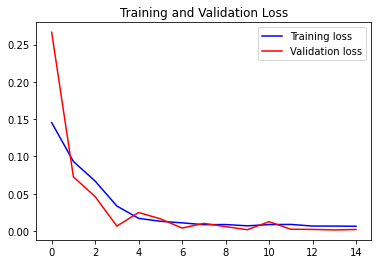

In [8]:
model, scaler = LSTM_train(data_training,timestep = 3,epochs = 15,batch_size = 50,validation_split = 0.1,train_test_split_date = '2021-09-05')


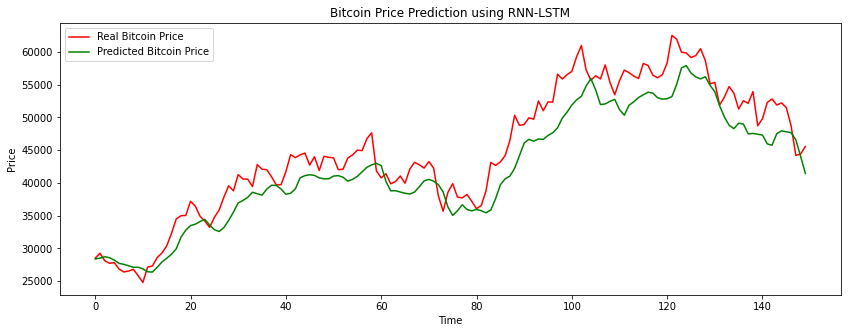

In [9]:
predict(model,data_training,data_test,timestep,scaler)